<a href="https://colab.research.google.com/github/Daarlens/ProBook/blob/main/MO_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# 1. Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score


In [27]:
# 2. Загрузка данных (вариант напрямую с UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)

print("Размер данных:", df.shape)
display(df.head())


Размер данных: (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [28]:

# 3. Подготовка признаков и целевой переменной

# Указываем имя столбца, который является целевой переменной (зависимой переменной, "меткой")
target_col = "DEATH_EVENT"

# Формируем матрицу признаков X, исключая целевую переменную
# Здесь остаются только независимые переменные (возраст, давление, анализы и т.д.)
X = df.drop(columns=[target_col])

# Сохраняем целевую переменную отдельно в вектор y
# Это "правильные ответы": 0 = выжил, 1 = умер
y = df[target_col].values

# ---------------------------
# Стандартизация признаков
# ---------------------------

# Создаём объект StandardScaler
# Он будет переводить каждый признак в стандартный масштаб: среднее = 0, стандартное отклонение = 1
scaler = StandardScaler()

# Применяем стандартизацию ко всем признакам
# На выходе X_scaled — это numpy-массив с нормализованными значениями
X_scaled = scaler.fit_transform(X)


In [29]:
# Применение функции PCA
# Инициализация PCA с 2 главными компонентами
pca = PCA(n_components=2)

# Преобразование данных в пространство главных компонент
components = pca.fit_transform(X_scaled)

# Коэффициенты дисперсии для каждой компоненты
print(pca.explained_variance_ratio_)

# Сингулярные значения для выбранных компонент
print(pca.singular_values_)


[0.13858049 0.13159129]
[22.29858251 21.72900274]


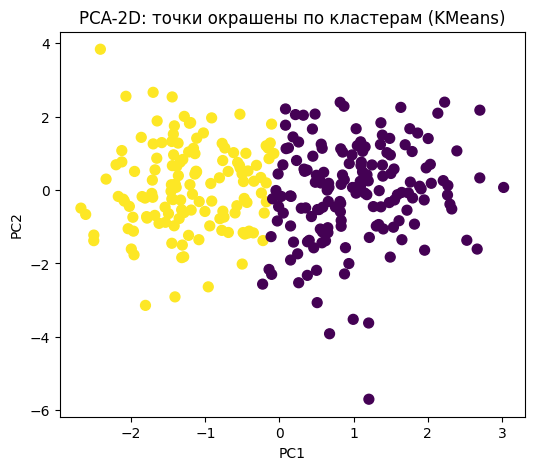

In [32]:
# --- Вариант 1. Кластеризация методом KMeans ---

# Создаём объект KMeans для кластеризации на 2 кластера
# n_clusters = 2, так как в данных есть два класса (death_event = 0 или 1)
# random_state = 42 фиксирует случайность для воспроизводимости результатов
# n_init = 20 означает, что алгоритм будет запускаться 20 раз с разными начальными центрами,
# и выберется лучший результат
kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)

# Выполняем кластеризацию в пространстве главных компонент (components)
clusters = kmeans.fit_predict(components)

# Строим график рассеяния (scatter plot)
plt.figure(figsize=(6,5))
# Точки окрашены по номерам кластеров, найденных KMeans
plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("PCA-2D: точки окрашены по кластерам (KMeans)")
plt.xlabel("PC1")  # первая главная компонента
plt.ylabel("PC2")  # вторая главная компонента
plt.show()


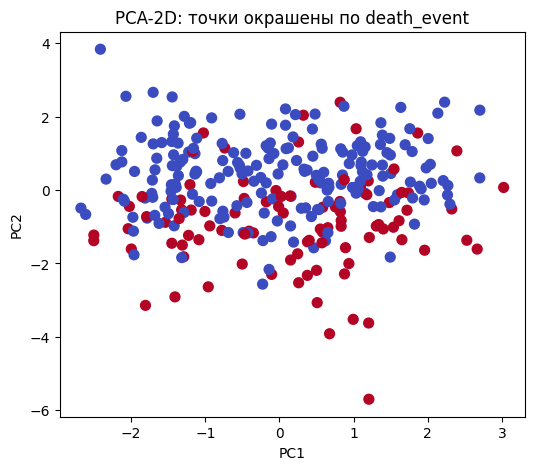

In [33]:
# --- Вариант 2. Окрашивание по целевой переменной death_event ---

# Строим график рассеяния (scatter plot) в тех же осях
plt.figure(figsize=(6,5))
# Теперь точки окрашены по реальным меткам death_event (0 = выжил, 1 = умер)
plt.scatter(components[:, 0], components[:, 1], c=y, cmap="coolwarm", s=50)
plt.title("PCA-2D: точки окрашены по death_event")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

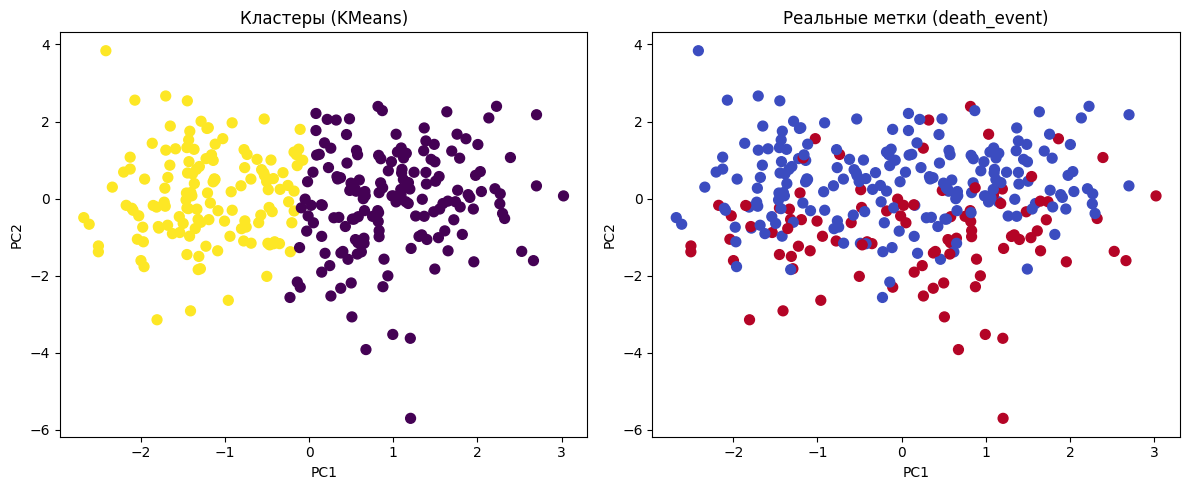

In [34]:
import matplotlib.pyplot as plt

# Создаём область для двух графиков (1 строка, 2 столбца)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Левый график: кластеры (KMeans) ---
kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
clusters = kmeans.fit_predict(components)

axes[0].scatter(components[:, 0], components[:, 1], c=clusters, cmap="viridis", s=50)
axes[0].set_title("Кластеры (KMeans)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# --- Правый график: реальные метки death_event ---
axes[1].scatter(components[:, 0], components[:, 1], c=y, cmap="coolwarm", s=50)
axes[1].set_title("Реальные метки (death_event)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

# Показываем оба графика
plt.tight_layout()
plt.show()


In [38]:
# 4. Функция для применения PCA и кластеризации методом KMeans
def run_pca_kmeans(n_components=2, n_clusters=2):
    # === Шаг 1. PCA (Principal Component Analysis) ===
    # Создаём объект PCA и задаём число главных компонент
    pca = PCA(n_components=n_components, random_state=42)

    # Применяем метод fit_transform: обучаем PCA и сразу преобразуем данные
    X_pca = pca.fit_transform(X_scaled)

    # Выводим долю объяснённой дисперсии для каждой из компонент
    print(f"\n=== PCA n_components={n_components} ===")
    print("Explained variance ratio:", pca.explained_variance_ratio_)

    # Выводим суммарную долю объяснённой дисперсии (сохраняемая информация)
    print("Суммарная объяснённая дисперсия:", pca.explained_variance_ratio_.sum())

    # === Шаг 2. Кластеризация методом KMeans ===
    # Задаём модель KMeans (число кластеров = 2, так как у нас есть 2 класса: смерть/выживание)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)

    # Запускаем алгоритм кластеризации в новом пространстве PCA
    clusters = kmeans.fit_predict(X_pca)

    # === Шаг 3. Оценка качества кластеризации ===
    # ARI (Adjusted Rand Index) — показывает совпадение кластеров с реальными метками
    # Silhouette score — показывает «сжатость» и разделимость кластеров
    ari = adjusted_rand_score(y, clusters)
    sil = silhouette_score(X_pca, clusters)

    print(f"ARI (Adjusted Rand Index): {ari:.3f}")
    print(f"Silhouette score: {sil:.3f}")

    # === Шаг 4. Визуализация результатов ===
    # Если у нас 2 компоненты — рисуем 2D-график
    if n_components == 2:
        plt.figure(figsize=(6,5))
        plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", s=50)
        plt.title(f"PCA-2D (n_components={n_components})")
        plt.xlabel("PC1")  # первая главная компонента
        plt.ylabel("PC2")  # вторая главная компонента
        plt.show()

    # Если у нас 3 компоненты — строим 3D-график
    if n_components == 3:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(7,6))
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=clusters, cmap="viridis", s=50)
        ax.set_title("PCA-3D Clusters")
        plt.show()

    # Возвращаем преобразованные данные и найденные кластеры
    return X_pca, clusters



=== PCA n_components=2 ===
Explained variance ratio: [0.13858049 0.13159129]
Суммарная объяснённая дисперсия: 0.270171778753327
ARI (Adjusted Rand Index): -0.001
Silhouette score: 0.367


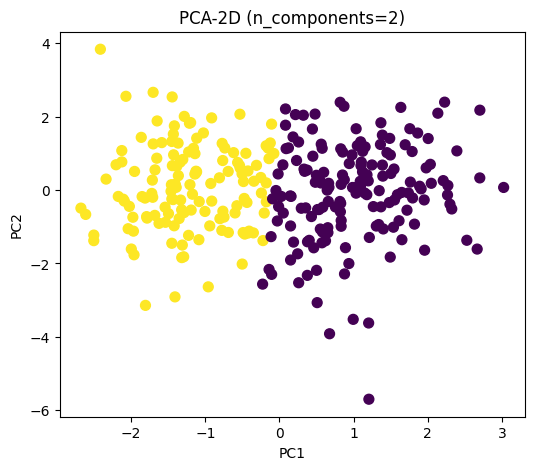


=== PCA n_components=3 ===
Explained variance ratio: [0.13858049 0.13159129 0.10567855]
Суммарная объяснённая дисперсия: 0.37585032424198694
ARI (Adjusted Rand Index): -0.000
Silhouette score: 0.272


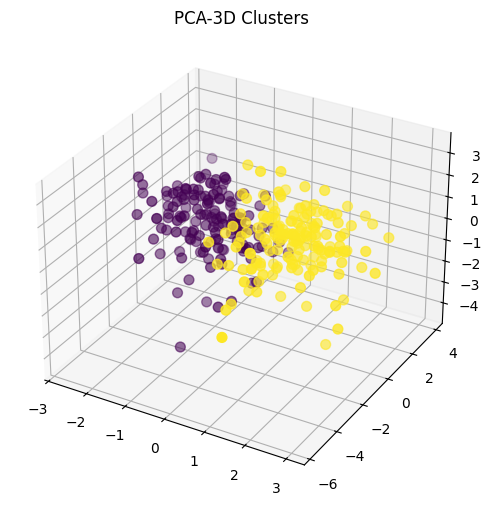


=== PCA n_components=1 ===
Explained variance ratio: [0.13858049]
Суммарная объяснённая дисперсия: 0.13858048548835775
ARI (Adjusted Rand Index): 0.003
Silhouette score: 0.620


In [36]:
# Исследование влияния числа главных компонент (n_components)

# --- Случай 2 компоненты ---
# Оставляем 2 главные компоненты и применяем KMeans (2 кластера)
X_pca2, clusters2 = run_pca_kmeans(n_components=2)

# --- Случай 3 компоненты ---
# Оставляем 3 главные компоненты и применяем KMeans (2 кластера)
X_pca3, clusters3 = run_pca_kmeans(n_components=3)

# --- Случай 1 компонента ---
# Оставляем 1 главную компоненту и применяем KMeans (2 кластера)
X_pca1, clusters1 = run_pca_kmeans(n_components=1)
